In [6]:
import seaborn as sns
import json
import pandas as pd
import re

In [26]:
results = pd.read_json('results copy.json')
results

,filename,average,total_odo,reached_2048,reached_1024
0,n4_a02_d09_agent.npy,23491.00,126569,50.0,85
1,n4_a02_d092_agent.npy,23894.28,128570,55.0,91
2,n4_a02_d094_agent.npy,28899.28,151476,65.0,92
3,n4_a02_d096_agent.npy,30268.72,156324,70.0,90
4,n4_a02_d098_agent.npy,35290.44,177452,76.0,95
5,n4_a02_d099_agent.npy,25179.16,130874,57.0,91
6,n4_a02_d1_agent.npy,31469.80,160636,68.0,91
7,n4_a01_d099_agent.npy,26786.48,141043,52.0,89
8,n4_a03_d099_agent.npy,21486.52,114103,48.0,82
9,n4_a04_d099_agent.npy,22297.52,119728,46.0,93


In [27]:
float(re.search('_a([^;]*)_d', 'n4_a02_d09_agent.npy').group(1).replace('0', '0.'))

0.2

In [31]:
results['learning_rate'] = results['filename'].apply(lambda x: float(re.search('_a([^;]*)_d', x).group(1).replace('0', '0.')))
results['decay'] = results['filename'].apply(lambda x: float(re.search('_d([^;]*)_agent', x).group(1).replace('0', '0.')))
results

,filename,average,total_odo,reached_2048,reached_1024,learning_rate,decay
0,n4_a02_d09_agent.npy,23491.00,126569,50.0,85,0.2,0.90
1,n4_a02_d092_agent.npy,23894.28,128570,55.0,91,0.2,0.92
2,n4_a02_d094_agent.npy,28899.28,151476,65.0,92,0.2,0.94
3,n4_a02_d096_agent.npy,30268.72,156324,70.0,90,0.2,0.96
4,n4_a02_d098_agent.npy,35290.44,177452,76.0,95,0.2,0.98
5,n4_a02_d099_agent.npy,25179.16,130874,57.0,91,0.2,0.99
6,n4_a02_d1_agent.npy,31469.80,160636,68.0,91,0.2,1.00
7,n4_a01_d099_agent.npy,26786.48,141043,52.0,89,0.1,0.99
8,n4_a03_d099_agent.npy,21486.52,114103,48.0,82,0.3,0.99
9,n4_a04_d099_agent.npy,22297.52,119728,46.0,93,0.4,0.99


In [ ]:
results['reached_2048_prct'] = results['reached_2048'] / 10
results['reached_1024_prct'] = results['reached_1024'] / 10

<AxesSubplot:xlabel='decay', ylabel='reached_2048'>

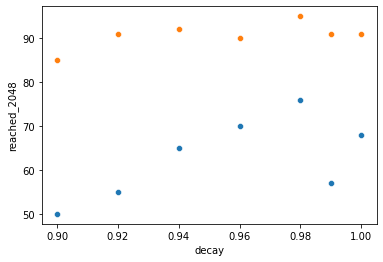

In [32]:
sns.scatterplot(data=results.loc[results['learning_rate'] == 0.2], x='decay', y= 'reached_2048')
sns.scatterplot(data=results.loc[results['learning_rate'] == 0.2], x='decay', y= 'reached_1024')

<AxesSubplot:xlabel='learning_rate', ylabel='reached_2048'>

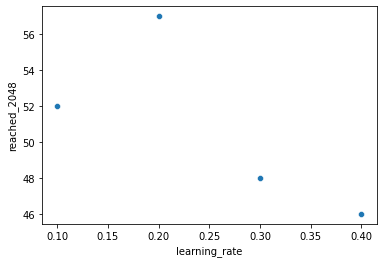

In [30]:
sns.scatterplot(data=results.loc[results['decay'] == 0.99], x='learning_rate', y= 'reached_2048')